In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.linear_model import LinearRegression


In [2]:
# Blood-Pressure data

age = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9,
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
pressure = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114,
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217]

age = np.asarray(age, np.float32)
pressure = np.asarray(pressure, np.float32)


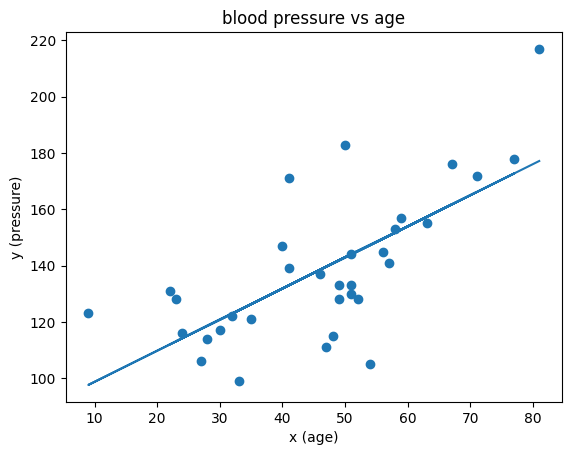

intercept =  87.67143 solpe =  1.1050216


In [3]:
# Raw-Scatter plot
plt.scatter(x=age, y=pressure)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (pressure)")

# Regression 
model = LinearRegression()
res = model.fit(age.reshape((len(age), 1)), pressure)  # Fitting the linear regression
predictions = model.predict(age.reshape((len(age), 1)))
plt.plot(age, predictions)
plt.show()
print("intercept = ", res.intercept_, "solpe = ", res.coef_[0])


In [4]:
# calc the MSE for first 5 datapoints
age_sub = age[0:5]       # extract the first 5 data points of x
pressure_sub = pressure[0:5]  # extract the first 5 data points of y
# Starting values [0: 100]
a = 1
b = 100
y_hat = a*age_sub + b
r = (pressure_sub - y_hat)
MSE = np.sum(np.square(r)) / len(pressure_sub)
MSE


317.2

In [5]:
# MSE for all datapoints
a = 1
b = 100
y_hat = a*age + b
r = (pressure - y_hat)
MSE = np.sum(np.square(r)) / len(pressure)
MSE


408.1515151515151

In [6]:
# Exercise: Minimize the MSE, by finding better values
mse_list = []

for a in np.arange(1,88,0.1):
    for b in np.arange(88,1,-0.1):
        y_hat = a*age + b 
        r = (pressure - y_hat)
        MSE = np.sum(np.square(r)) / len(pressure)
        mse_list.append((MSE, a, b))
        #print(f' MSE {MSE} a {a} b {b} ')


In [7]:
print(min(mse_list))
# Lowest MSE with whole numbers a = 1 , b = 93
res1 = (352.3636363636364, 1, 93)

# Lowest MSE with float numbers a = 1,1 , b = 87,9
res2 = (349.2076231060606, 1.1, 87.900000000)


(349.2076231060606, 1.1, 87.9)


In [8]:
# closed form solution vs MSE
a_hat = np.sum((age-np.mean(age))*((pressure-np.mean(pressure)))) / \
    (np.sum(np.square(age-np.mean(age))))
b_hat = np.mean(pressure) - a_hat*np.mean(age)

a = a_hat
b = b_hat
y_hat = a*age + b
r = (pressure - y_hat)
MSE = np.sum(r**2) / len(pressure)

print("slope : a_hat = ", a_hat)
print("intercept : b_hat = ", b_hat)
print("minimal MSE = ", MSE)


slope : a_hat =  1.1050217
intercept : b_hat =  87.67143
minimal MSE =  349.20090553977275


In [9]:
# Gradient Descend method with one tunable parameter

b = 87.6
a = np.arange(-1, 2, 0.02)
MSE = np.zeros(len(a))
for i in range(0, len(a)):
  MSE[i] = np.mean(np.square(pressure-(a[i] * age + b)))


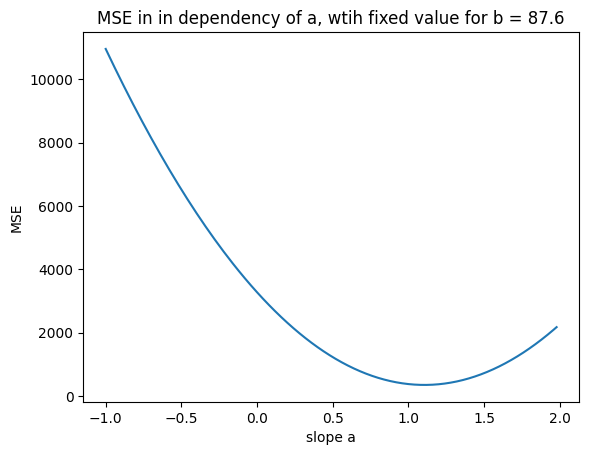

In [10]:
plt.plot(a, MSE)
plt.title("MSE in in dependency of a, wtih fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.show()


In [11]:
# changing the learning rate finidng a better a value
# study how the slope a gets updated
a_ = -0.5
a_history = -0.5
eta = 0.0002
for i in range(0, 3):
  grad_a = -2/len(pressure)*np.sum((pressure - a_ * age - b) * age)
  a_ = a_ - eta*grad_a
  a_history = np.append(a_history, a_)
print(a_history)


[-0.5         1.03739157  1.10343419  1.10627117]


In [12]:
"""
target = a_hat =  1.1050217

original:
eta = 0.0003
for i in range(0,5):
[-0.5         1.80608736  0.80163942  1.23914048  1.04858093  1.1315818]

better cuz less updates
a_ = -0.5
a_history = -0.5
eta = 0.0002
for i in range(0, 3):

[-0.5         1.03739157  1.10343419  1.10627117]    
"""


'\ntarget = a_hat =  1.1050217\n\noriginal:\neta = 0.0003\nfor i in range(0,5):\n[-0.5         1.80608736  0.80163942  1.23914048  1.04858093  1.1315818]\n\nbetter cuz less updates\na_ = -0.5\na_history = -0.5\neta = 0.0002\nfor i in range(0, 3):\n\n[-0.5         1.03739157  1.10343419  1.10627117]    \n'

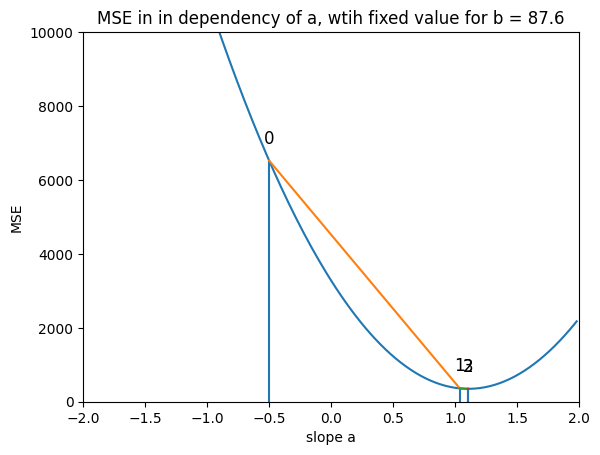

In [13]:
plt.plot(a, MSE)
plt.title("MSE in in dependency of a, wtih fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.ylim((0, 10000))
plt.xlim((-2, 2))

for i in range(0, len(a_history)):
  plt.vlines(x=a_history[i], ymin=0, ymax=np.mean(
      np.square(pressure-(a_history[i] * age + b))))
  plt.text(x=a_history[i], y=np.mean(np.square(pressure-(a_history[i] * age + b)))+600,
           s=i, horizontalalignment='center', verticalalignment='center', fontsize=12)
for i in range(0, len(a_history)-1):
  plt.plot([a_history[i], a_history[i+1]], [np.mean(np.square(pressure -
                                                              (a_history[i] * age + b))), np.mean(np.square(pressure-(a_history[i+1] * age + b)))])
plt.show()
